In [1]:
%matplotlib inline
import pandas as pd, matplotlib.pyplot as plt


In [2]:
marketing = pd.read_csv('DirectMarketing.csv')

In [3]:
# Taks 1 Querying and Counting

# 1. Print the count of each unique value in the Catalogs variable

marketing['Catalogs'].value_counts()
# marketing['Catalogs'].value_counts().sort_index()


12    282
6     252
24    233
18    233
Name: Catalogs, dtype: int64

In [4]:
marketing

,Age,Gender,OwnHome,Married,Location,Salary,Children,History,Catalogs,AmountSpent
0,Old,Female,Own,Single,Far,47500,0,High,6,755
1,Middle,Male,Rent,Single,Close,63600,0,High,6,1318
2,Young,Female,Rent,Single,Close,13500,0,Low,18,296
3,Middle,Male,Own,Married,Close,85600,1,High,18,2436
4,Middle,Female,Own,Single,Close,68400,0,High,12,1304
...,...,...,...,...,...,...,...,...,...,...
995,Young,Female,Rent,Single,Close,19400,1,NaN,18,384
996,Middle,Male,Rent,Single,Far,40500,1,NaN,18,1073
997,Old,Male,Own,Single,Close,44800,0,Medium,24,1417
998,Middle,Male,Own,Married,Close,79000,2,Medium,18,671


In [5]:
# 2 Print the average customer spending for each unique value of Catalogs received
avg_customer_spending_catalogs_6 = marketing.query('Catalogs == 6')
avg_customer_spending_catalogs_6['AmountSpent'].mean()

avg_customer_spending_catalogs_12 = marketing.query('Catalogs == 12')
avg_customer_spending_catalogs_12['AmountSpent'].mean()

avg_customer_spending_catalogs_18 = marketing.query('Catalogs == 18')
avg_customer_spending_catalogs_18['AmountSpent'].mean()

avg_customer_spending_catalogs_24 = marketing.query('Catalogs == 24')
avg_customer_spending_catalogs_24['AmountSpent'].mean()

print(avg_customer_spending_catalogs_6['AmountSpent'].mean())
print(avg_customer_spending_catalogs_12['AmountSpent'].mean())
print(avg_customer_spending_catalogs_18['AmountSpent'].mean())
print(avg_customer_spending_catalogs_24['AmountSpent'].mean())



616.6746031746031
1017.854609929078
1495.5450643776824
1827.7725321888413


In [6]:
unique_catalogs = marketing['Catalogs'].value_counts().index
unique_catalogs

Int64Index([12, 6, 24, 18], dtype='int64')

In [7]:
# General methods
for index in unique_catalogs:
    filtered_data = marketing.query('Catalogs == @index')
    print(f"Mean for Catalogs {index} is: ", filtered_data['AmountSpent'].mean())

Mean for Catalogs 12 is:  1017.854609929078
Mean for Catalogs 6 is:  616.6746031746031
Mean for Catalogs 24 is:  1827.7725321888413
Mean for Catalogs 18 is:  1495.5450643776824


In [8]:
# 4 Potional Extension --- Statistical Test
from scipy import stats

# we use one_way ANOVA(单因素方差分析)，in this case, the factor is Catalogs amount

stats.f_oneway(avg_customer_spending_catalogs_6['AmountSpent'],
               avg_customer_spending_catalogs_12['AmountSpent'],
               avg_customer_spending_catalogs_18['AmountSpent'],
               avg_customer_spending_catalogs_24['AmountSpent'])


F_onewayResult(statistic=96.01899768505297, pvalue=1.3693342183192683e-54)

<center><h1>BUSS6002 - Data Science in Business</h1></center>

# Tutorial 3 Tasks

Use ``DirectMarketing.csv``

## Task 1 - Querying and Counting

#### What is the relationship between customer spending and number of catalogs?

*Following on from last week, we take another look at this relationship from another angle*

1. Print the count of each unique value in the Catalogs variable
2. Print the average customer spending for each unique value of Catalogs received
3. Describe the relationship that you observe between Catalogs received and Amount Spent
4. **Optional Extension**: Can you think of a statistical test that can be used to determine if there is a difference in the amount spent between the different catalog groups? Try to implement this. Common tests can be found in the scipy package https://docs.scipy.org/doc/scipy/reference/stats.html


## Task 2 - Querying and Visualisation

#### 2.1 What is the distribution of Customer Salary?

Create a histogram of all customer's salary.

<img src="img/salary_dist.png" width=400>

#### 2.2 What is the distribution of Salary for High Spending Customers?

1. Create a histogram of customer salary for customers that spent more than $500$ dollars.
2. Save this figure as a PDF

<img src="img/big_spenders.png" width=400>

#### 2.3 Is the amount spent different for male and female customers?

1. Create a single plot with two histograms, one of amount spent for male customers, the other for female customers
2. Calculate and report the mean and variance of amount spent for both customer segments 

<img src="img/male_female.png" width=400>

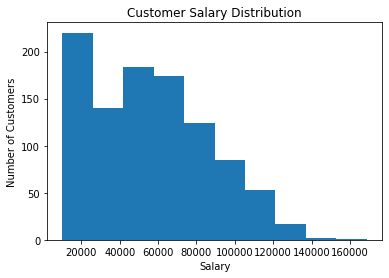

In [9]:
# 2.1 Create a histogram of all customer's salary
plt.hist(marketing['Salary'])

plt.xlabel('Salary')
plt.ylabel('Number of Customers')
plt.title('Customer Salary Distribution')
plt.show()

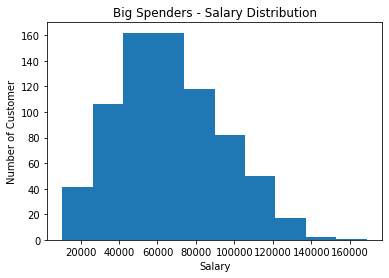

In [10]:
# 2.2 
# Create a histogram of customer salary for customers that spent more than  500  dollars.
# Save this figure as a PDF

big_spender = marketing[marketing['AmountSpent'] > 500]['Salary']


plt.hist(big_spender)

plt.title('Big Spenders - Salary Distribution')
plt.xlabel('Salary')
plt.ylabel('Number of Customer')
plt.savefig('figure.pdf')

plt.show()

In [12]:
# 2.3 Is the amount spent different for male and female customers?

# Create a single plot with two histograms, one of amount spent for male customers, the other for female customers
# Calculate and report the mean and variance of amount spent for both customer segments
male_customer = marketing[marketing['Gender'] == 'Male']
female_customer = marketing[marketing['Gender'] == 'Female']

male_mean = male_customer['AmountSpent'].mean()
male_var = male_customer['AmountSpent'].var()

female_mean = female_customer['AmountSpent'].mean()
female_var = female_customer['AmountSpent'].var()


print(f'The mean for male customer is {male_mean}, and the variance is {male_var}')
print(f'The mean for female customer is {female_mean}, and the variance is {female_var}')





The mean for male customer is 1412.8502024291497, and the variance is 946281.3771094923
The mean for female customer is 1025.3399209486165, and the variance is 829063.0842249444
